# Augment Data :)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### helper function
1. change_brightness
2. shift

In [42]:
def change_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    # can be changed the brightness at here (currently 2.0)
    random_bright = 2.0 #+np.random.uniform()*.4 
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def shift(image,trans_range):
    rows,cols = image.shape[0:2]
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    return image_tr

### Step
1. read test image
2. flip (class will be changed)
3. change brightness, shifting (augmentation in same class)
4. plot, plot, plot...

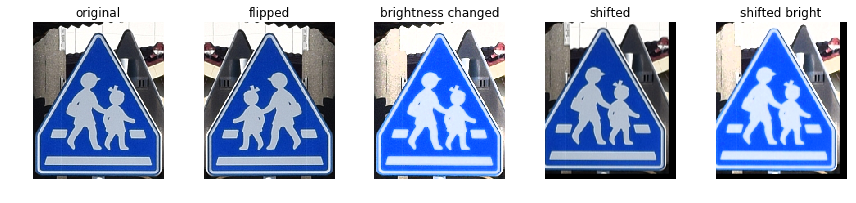

In [56]:
# 1. read test image
img = cv2.imread('./crosswalk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 2. flip (class will be changed)
flipped = cv2.flip(img,1)
# 3. change brightness, shifting, and both (augmentation in same class)
bright = change_brightness(img)
shifted = shift(img, 20)
shifted_bright = change_brightness(shifted)
# 4. plot, plot, plot...
f, axes = plt.subplots(1, 5, figsize=(12, 6))
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('original')
axes[1].imshow(flipped)
axes[1].axis('off')
axes[1].set_title('flipped')
axes[2].imshow(bright)
axes[2].axis('off')
axes[2].set_title('brightness changed')
axes[3].imshow(shifted)
axes[3].axis('off')
axes[3].set_title('shifted')
axes[4].imshow(shifted_bright)
axes[4].axis('off')
axes[4].set_title('shifted bright')
plt.tight_layout()